In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy.linalg import inv

In [44]:
plt.style.use(['ggplot'])
data = pd.read_csv('data.txt')
data.columns = ["id", "long", "lati", "alti"]
data = data.drop('id',axis = 1);

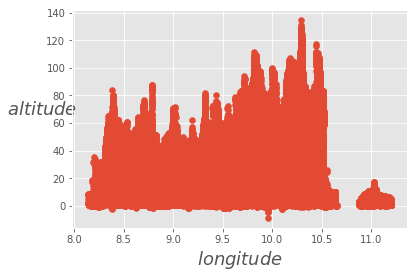

In [3]:
plt.scatter(data['long'],data['alti'])
plt.xlabel("$longitude$", fontsize=18)
plt.ylabel("$altitude$", rotation=0, fontsize=18)
plt.show()

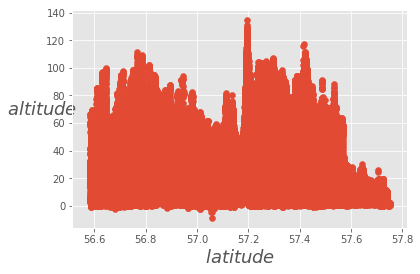

In [4]:
plt.scatter(data['lati'],data['alti'])
plt.xlabel("$latitude$", fontsize=18)
plt.ylabel("$altitude$", rotation=0, fontsize=18)
plt.show()

In [45]:
x = data.drop('alti',axis = 1)
x['bias'] = 1
x = x[['bias','lati','long']]
y = data['alti']

In [46]:
y.head()

0    17.614840
1    18.083536
2    18.279465
3    18.422974
4    19.124889
Name: alti, dtype: float64

In [47]:
X = np.array(x)
y = np.array(y)

y.shape

(434873,)

In [48]:
X[:,1:] = (X[:,1:]-np.mean(X[:,1:], axis = 0))/np.std(X[:,1:],axis = 0)
y = (y-np.mean(y))/np.std(y)

# print(X.mean(axis = 0))

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [51]:
y_train.shape

(304411,)

In [52]:
X_transpose = X.T
Y = y
coeff = inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)
loss = 0.5*pow((Y-coeff[0]-coeff[1]*X[:,1]-coeff[2]*X[:,2]),2).sum()
print(coeff)
print(loss)

[  9.60416100e-15  -1.90628441e-01   1.50381653e-01]
211684.477106


In [53]:
def  lossfunc(x_,w_,y_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)

In [54]:
w = np.random.randn((3))
print(w.dot(X_train.T).shape)

(304411,)


In [100]:
# Gradient Descent 

alpha =0.01
itns = 1000

losses = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_train.T)
    loss_ = lossfunc(X_train,w,y_train)
    losses.append(loss_)
#     print((y_hat - y_train)[:10])
#     print(w.dot(X_train.T).shape)
    
    if i%20 == 0:  
        print("iteration: {} loss : {}" .format(i,loss_))
#     print(y_hat.shape, y.shape)
    w_der = (y_hat-y_train)*(X_train.T)
#     print(w_der.shape)
    w_der_norm = np.mean(w_der, axis = 1)
#     print(w_der.shape)
#     print(w_der_norm.shape)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 2.1306353006529255
iteration: 20 loss : 1.364313492326645
iteration: 40 loss : 0.9563570699869264
iteration: 60 loss : 0.7389892280979939
iteration: 80 loss : 0.6230118693101747
iteration: 100 loss : 0.5609982450652479
iteration: 120 loss : 0.5277274417787013
iteration: 140 loss : 0.5097839111573836
iteration: 160 loss : 0.5000287741985329
iteration: 180 loss : 0.4946607830600422
iteration: 200 loss : 0.4916538647046143
iteration: 220 loss : 0.4899264242575444
iteration: 240 loss : 0.4888996449786104
iteration: 260 loss : 0.4882625833579253
iteration: 280 loss : 0.48784720576870094
iteration: 300 loss : 0.4875618807497261
iteration: 320 loss : 0.48735595683927896
iteration: 340 loss : 0.48720087516954674
iteration: 360 loss : 0.4870800805158726
iteration: 380 loss : 0.486983617047166
iteration: 400 loss : 0.4869052208443739
iteration: 420 loss : 0.4868407451314329
iteration: 440 loss : 0.4867872985770558
iteration: 460 loss : 0.48674276655194304
iteration: 4

In [101]:
# Gradient Descent 

alpha =0.01
itns = 1000

losses_test = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_test.T)
    loss_ = lossfunc(X_test,w,y_test)
    losses_test.append(loss_)
    
    if i%20 == 0:  
        print("iteration: {} loss : {}" .format(i,loss_))

    w_der = (y_hat-y_test)*(X_test.T)

    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 2.1282342911267245
iteration: 20 loss : 1.3642476244699342
iteration: 40 loss : 0.9571863526749858
iteration: 60 loss : 0.7401045727689863
iteration: 80 loss : 0.6241737371926629
iteration: 100 loss : 0.5621249729687753
iteration: 120 loss : 0.528800614461269
iteration: 140 loss : 0.5108076069948478
iteration: 160 loss : 0.5010130036408785
iteration: 180 loss : 0.4956154185310104
iteration: 200 loss : 0.49258688384402155
iteration: 220 loss : 0.4908437709473575
iteration: 240 loss : 0.4898055888791253
iteration: 260 loss : 0.4891601502355318
iteration: 280 loss : 0.4887385405742625
iteration: 300 loss : 0.48844851786939475
iteration: 320 loss : 0.4882390095818555
iteration: 340 loss : 0.48808116474438834
iteration: 360 loss : 0.4879582227868367
iteration: 380 loss : 0.48786008091047256
iteration: 400 loss : 0.4877803678923443
iteration: 420 loss : 0.4877148570481851
iteration: 440 loss : 0.4876605964602419
iteration: 460 loss : 0.4876154248562198
iteration: 

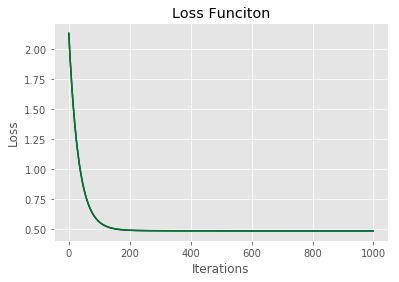

In [105]:
plt.plot(losses, 'b')
plt.plot(losses_test, 'g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [103]:
# Stochastic Gradient Descent

alpha =0.0005
itns = 10000

losses_st = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    index = np.random.randint(X_train.shape[0])
#     print(index)
    x_st = X_train[index]
    y_st = y_train[index]
    y_hat = np.sum(w*x_st)
#     print(x_st, y_hat, y_st)
    loss_ = lossfunc(X_train,w,y_train)
    losses_st.append(loss_)
    if i%2000 == 0:
        print("iteration: {} loss : {}" .format(i,loss_))


    w_der = (y_hat-y_st)*(x_st)
#     print(w_der)
    w = w - alpha*w_der
    
print(w)


[0 1 1]
iteration: 0 loss : 2.1306353006529255
iteration: 2000 loss : 0.5473256157125322
iteration: 4000 loss : 0.48973029071109425
iteration: 6000 loss : 0.48825858755854024
iteration: 8000 loss : 0.4869987266580013
[-0.02357996 -0.17587324  0.13224788]


In [72]:
# Stochastic Gradient Descent

alpha =0.0005
itns = 10000

losses_stest = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    index = np.random.randint(X_test.shape[0])

    x_st = X_test[index]
    y_st = y_test[index]
    y_hat = np.sum(w*x_st)

    loss_ = lossfunc(X_test,w,y_test)
    losses_stest.append(loss_)
    if i%2000 == 0:
        print("iteration: {} loss : {}" .format(i,loss_))
    w_der = (y_hat-y_st)*(x_st)
#     print(w_der)
    w = w - alpha*w_der
    
print(w)


[0 1 1]
iteration: 0 loss : 2.1282342911267245
iteration: 2000 loss : 0.5606577955535667
iteration: 4000 loss : 0.49417385717290374
iteration: 6000 loss : 0.49128170299325624
iteration: 8000 loss : 0.48817932705137446
[-0.01203938 -0.18894378  0.10747561]


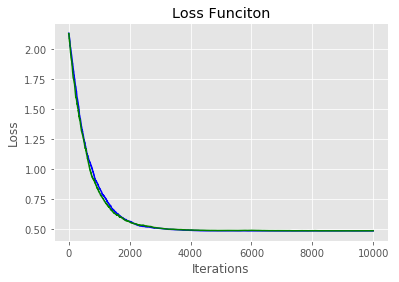

In [73]:
plt.plot(losses_st, 'b')
plt.plot(losses_stest, 'g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [ ]:
def  lossL1(x_,w_,y_):
    return 0.5*np.sum((w_.dot(x_.T)-y_)**2)+np.sum(np.abs(w_))

In [91]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000

losses_l1 = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_train.T)
    loss_ = lossL1(X_train,w,y_train)
    losses_l1.append(loss_)
#     print((y_hat - y_train)[:10])
#     print(w.dot(X_train.T).shape)
    
    if i%20 == 0:  
        print("iteration: {} loss : {}" .format(i,loss_))
#     print(y_hat.shape, y.shape)
    w_der = (y_hat-y_train)*(X_train.T)
#     print(w_der.shape)
    w_der_norm = np.mean(w_der, axis = 1) + np.sign(w)
#     print(w_der.shape)
#     print(w_der_norm.shape)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 3.1306353006529255
iteration: 20 loss : 2.8709177575681872
iteration: 40 loss : 2.632072951860592
iteration: 60 loss : 2.412677467610072
iteration: 80 loss : 2.2113965036366694
iteration: 100 loss : 2.026981134597449
iteration: 120 loss : 1.8582629430066238
iteration: 140 loss : 1.704148982215341
iteration: 160 loss : 1.5636170500839082
iteration: 180 loss : 1.4357112543160973
iteration: 200 loss : 1.31953785158677
iteration: 220 loss : 1.2142613436848135
iteration: 240 loss : 1.1191008149177433
iteration: 260 loss : 1.0333264959861852
iteration: 280 loss : 0.9562565404397696
iteration: 300 loss : 0.8872540006741785
iteration: 320 loss : 0.8257239912256431
iteration: 340 loss : 0.7711110278671496
iteration: 360 loss : 0.7228965317130256
iteration: 380 loss : 0.6805964881981228
iteration: 400 loss : 0.6437592514171995
iteration: 420 loss : 0.6119634848916787
iteration: 440 loss : 0.584816230377107
iteration: 460 loss : 0.5619510968374611
iteration: 480 loss :

In [92]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000

losses_l1_test = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_test.T)
    loss_ = lossL1(X_test,w,y_test)
    losses_l1_test.append(loss_)
    if i%20 == 0:  
        print("iteration: {} loss : {}" .format(i,loss_))
    w_der = (y_hat-y_test)*(X_test.T)
    w_der_norm = np.mean(w_der, axis = 1) + np.sign(w)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 3.1282342911267245
iteration: 20 loss : 2.8690291887134305
iteration: 40 loss : 2.630632364208617
iteration: 60 loss : 2.4116289326551428
iteration: 80 loss : 2.210689496581081
iteration: 100 loss : 2.026570083926605
iteration: 120 loss : 1.8581068146929387
iteration: 140 loss : 1.7042108960153357
iteration: 160 loss : 1.5638639255726736
iteration: 180 loss : 1.4361134844707144
iteration: 200 loss : 1.3200690018859857
iteration: 220 loss : 1.2148978748372299
iteration: 240 loss : 1.1198218274655687
iteration: 260 loss : 1.034113495157054
iteration: 280 loss : 0.957093219735788
iteration: 300 loss : 0.8881259631138745
iteration: 320 loss : 0.8266187104593452
iteration: 340 loss : 0.7720176510563628
iteration: 360 loss : 0.7238056874632461
iteration: 380 loss : 0.6815001448656983
iteration: 400 loss : 0.6446505871086201
iteration: 420 loss : 0.6128367682623279
iteration: 440 loss : 0.5856667114016053
iteration: 460 loss : 0.5627749067842359
iteration: 480 loss

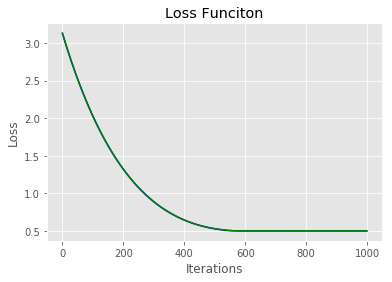

In [96]:
plt.plot(losses_l1, 'b')
plt.plot(losses_l1_test, 'g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [84]:
def  lossL2(x_,w_,y_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+0.5*np.sum(w_**2)

In [85]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000

losses_l2 = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_train.T)
    loss_ = lossL2(X_train,w,y_train)
    losses_l2.append(loss_)
#     print((y_hat - y_train)[:10])
#     print(w.dot(X_train.T).shape)
    
    if i%20 == 0:  
        print("iteration: {} loss : {}" .format(i,loss_))
#     print(y_hat.shape, y.shape)
    w_der = (y_hat-y_train)*(X_train.T)
#     print(w_der.shape)
    w_der_norm = np.mean(w_der, axis = 1) + w
#     print(w_der.shape)
#     print(w_der_norm.shape)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 3.1306353006529255
iteration: 20 loss : 2.873295199866461
iteration: 40 loss : 2.6410939425075126
iteration: 60 loss : 2.4315754303543398
iteration: 80 loss : 2.2425235489677595
iteration: 100 loss : 2.0719387179290756
iteration: 120 loss : 1.9180167325081008
iteration: 140 loss : 1.7791296728472088
iteration: 160 loss : 1.6538086786279633
iteration: 180 loss : 1.540728406929332
iteration: 200 loss : 1.4386930087997825
iteration: 220 loss : 1.346623476138081
iteration: 240 loss : 1.2635462249796097
iteration: 260 loss : 1.188582794369804
iteration: 280 loss : 1.120940551812559
iteration: 300 loss : 1.0599043069339118
iteration: 320 loss : 1.0048287446129083
iteration: 340 loss : 0.9551315975038186
iteration: 360 loss : 0.9102874856987986
iteration: 380 loss : 0.8698223583402718
iteration: 400 loss : 0.8333084783626481
iteration: 420 loss : 0.8003598972907905
iteration: 440 loss : 0.7706283722087901
iteration: 460 loss : 0.7437996816919694
iteration: 480 loss

In [98]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000

losses_l2_test = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_test.T)
    loss_ = lossL2(X_test,w,y_test)
    losses_l2_test.append(loss_)
    
    if i%20 == 0:  
        print("iteration: {} loss : {}" .format(i,loss_))
    w_der = (y_hat-y_test)*(X_test.T)
    w_der_norm = np.mean(w_der, axis = 1) + w
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 3.1282342911267245
iteration: 20 loss : 2.871399647815795
iteration: 40 loss : 2.639634407493949
iteration: 60 loss : 2.430491147324213
iteration: 80 loss : 2.241761399804471
iteration: 100 loss : 2.0714523209325986
iteration: 120 loss : 1.9177656365883762
iteration: 140 loss : 1.7790786446735858
iteration: 160 loss : 1.6539270722740915
iteration: 180 loss : 1.540989606708974
iteration: 200 loss : 1.439073937019026
iteration: 220 loss : 1.3471041584070966
iteration: 240 loss : 1.264109406544382
iteration: 260 loss : 1.1892136016522048
iteration: 280 loss : 1.1216261939951924
iteration: 300 loss : 1.0606338130031754
iteration: 320 loss : 1.0055927317872175
iteration: 340 loss : 0.9559220674309857
iteration: 360 loss : 0.9110976452131386
iteration: 380 loss : 0.8706464619317097
iteration: 400 loss : 0.8341416898317858
iteration: 420 loss : 0.801198168349905
iteration: 440 loss : 0.7714683360430055
iteration: 460 loss : 0.7446385597208158
iteration: 480 loss : 

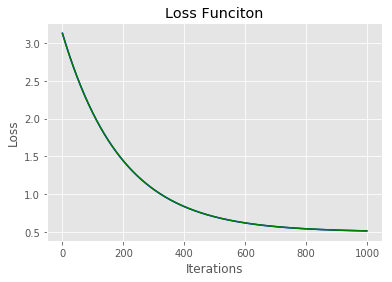

In [99]:
plt.plot(losses_l2, 'b')
plt.plot(losses_l2_test, 'g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()